In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data\\words\\processed_words_set_from_the_supervisor.csv", encoding='windows-1251')
df

DocumentName           Word NormalizedWord  \
0       VoenObozren2016_2019_1_0367.t              в              в   
1       VoenObozren2016_2019_1_0366.t              в              в   
2       VoenObozren2016_2019_1_0365.t              в              в   
3       VoenObozren2016_2019_1_0364.t              в              в   
4       VoenObozren2016_2019_1_0363.t              в              в   
...                               ...            ...            ...   
207078  VoenObozren2016_2019_1_0001.t      калечащих      калечащий   
207079  VoenObozren2016_2019_1_0001.t  заточка-пилка  заточка-пилка   
207080  VoenObozren2016_2019_1_0001.t       зарослей        заросль   
207081  VoenObozren2016_2019_1_0001.t       выручали        выручал   
207082  VoenObozren2016_2019_1_0001.t           боуи           боуи   

        FrequencyInText  FrequencyInCorpus PartOfSpeech  
0                    85              19397            F  
1                    23              19397            F  
2                    51              19397            F  
3                    59              19397            F  
4                    43              19397            F  
...                 ...                ...          ...  
207078                1                  1            A  
207079                1                  1            N  
207080                1                  1            N  
207081                1                  1            L  
207082                1                  1            N  

[207083 rows x 6 columns]

In [3]:
meaningless_pos = {'0', '&', 'F', 'e', 's', 'm', 'M', 'Y', 'n'}
df = df[~df['PartOfSpeech'].isin(meaningless_pos)]
df

DocumentName           Word NormalizedWord  \
1450    VoenObozren2016_2019_1_0367.t           было            был   
1451    VoenObozren2016_2019_1_0366.t           было            был   
1452    VoenObozren2016_2019_1_0365.t           было            был   
1453    VoenObozren2016_2019_1_0364.t           было            был   
1454    VoenObozren2016_2019_1_0363.t           было            был   
...                               ...            ...            ...   
207078  VoenObozren2016_2019_1_0001.t      калечащих      калечащий   
207079  VoenObozren2016_2019_1_0001.t  заточка-пилка  заточка-пилка   
207080  VoenObozren2016_2019_1_0001.t       зарослей        заросль   
207081  VoenObozren2016_2019_1_0001.t       выручали        выручал   
207082  VoenObozren2016_2019_1_0001.t           боуи           боуи   

        FrequencyInText  FrequencyInCorpus PartOfSpeech  
1450                 13               5324            L  
1451                  5               5324            L  
1452                 30               5324            L  
1453                  4               5324            L  
1454                 19               5324            L  
...                 ...                ...          ...  
207078                1                  1            A  
207079                1                  1            N  
207080                1                  1            N  
207081                1                  1            L  
207082                1                  1            N  

[174520 rows x 6 columns]

In [4]:
meaningless_words = {
    'быть', 'был', 'есть', 'будет', 'может', 'мочь', 'являться',
    'имеющий', 'имеющая', 'имеющее', 'имеющие',
    'идущий', 'идущая', 'идущие', 'идущего',
    'он', 'я', 'сам', 'сама', 'само', 'сами', 'тот', 'та', 'то', 'те',
    'такой', 'такая', 'такое', 'такие', 'данный', 'данная', 'данное', 'данные',
    'чего', 'почему', 'зачем', 'где', 'когда', 'пока',
    'уже', 'еще', 'сейчас', 'теперь', 'тогда',
    'должен', 'должна', 'должно', 'должны',
    'человек', 'люди', 'раз', 'мир', 'время', 'год',
    'прошлый', 'следующий', 'новый', 'старый', 'большой', 'маленький',
    'который', 'которая', 'которое', 'которые',
    'поэтому'
}
df = df[~df['NormalizedWord'].isin(meaningless_words)]
df

DocumentName           Word NormalizedWord  \
5956    VoenObozren2016_2019_1_0364.t         ракеты         ракета   
5957    VoenObozren2016_2019_1_0362.t          ракет         ракета   
5958    VoenObozren2016_2019_1_0359.t          ракет         ракета   
5959    VoenObozren2016_2019_1_0353.t          ракет         ракета   
5960    VoenObozren2016_2019_1_0352.t         ракеты         ракета   
...                               ...            ...            ...   
207078  VoenObozren2016_2019_1_0001.t      калечащих      калечащий   
207079  VoenObozren2016_2019_1_0001.t  заточка-пилка  заточка-пилка   
207080  VoenObozren2016_2019_1_0001.t       зарослей        заросль   
207081  VoenObozren2016_2019_1_0001.t       выручали        выручал   
207082  VoenObozren2016_2019_1_0001.t           боуи           боуи   

        FrequencyInText  FrequencyInCorpus PartOfSpeech  
5956                 37               2217            N  
5957                  2               2217            N  
5958                  1               2217            N  
5959                  3               2217            N  
5960                  1               2217            N  
...                 ...                ...          ...  
207078                1                  1            A  
207079                1                  1            N  
207080                1                  1            N  
207081                1                  1            L  
207082                1                  1            N  

[169606 rows x 6 columns]

In [5]:
df = df.copy()
df['FrequencyInText'] = df['FrequencyInText'].astype(int)
df['FrequencyInCorpus'] = df['FrequencyInCorpus'].astype(int)

filtered_df = df[(df['FrequencyInCorpus'] > 1) & (df['FrequencyInText'] > 1)]
doc_word_matrix = filtered_df.pivot_table(
    index='DocumentName',
    columns='NormalizedWord',
    values='FrequencyInText',
    aggfunc='sum',
    fill_value=0
)

filtered_df

DocumentName          Word NormalizedWord  \
5956    VoenObozren2016_2019_1_0364.t        ракеты         ракета   
5957    VoenObozren2016_2019_1_0362.t         ракет         ракета   
5959    VoenObozren2016_2019_1_0353.t         ракет         ракета   
5962    VoenObozren2016_2019_1_0346.t      ракетами         ракета   
5963    VoenObozren2016_2019_1_0345.t        ракеты         ракета   
...                               ...           ...            ...   
198152  VoenObozren2016_2019_1_0004.t  плащ-палатка   плащ-палатка   
198164  VoenObozren2016_2019_1_0003.t          юнга           юнга   
198182  VoenObozren2016_2019_1_0002.t   изготовлять    изготовлять   
198187  VoenObozren2016_2019_1_0002.t    Голограммы     голограмма   
198190  VoenObozren2016_2019_1_0001.t     спецвойск     спецвойско   

        FrequencyInText  FrequencyInCorpus PartOfSpeech  
5956                 37               2217            N  
5957                  2               2217            N  
5959                  3               2217            N  
5962                  2               2217            N  
5963                 17               2217            N  
...                 ...                ...          ...  
198152                2                  2            N  
198164                2                  2            N  
198182                2                  2            I  
198187                2                  2            N  
198190                2                  2            N  

[54031 rows x 6 columns]

In [6]:
doc_word_matrix.head(25)

NormalizedWord                 Бронеавтомобиль-бронедрезина  \
DocumentName                                                  
VoenObozren2016_2019_1_0001.t                             0   
VoenObozren2016_2019_1_0002.t                             0   
VoenObozren2016_2019_1_0003.t                             0   
VoenObozren2016_2019_1_0004.t                             0   
VoenObozren2016_2019_1_0005.t                             0   
VoenObozren2016_2019_1_0006.t                             0   
VoenObozren2016_2019_1_0007.t                             0   
VoenObozren2016_2019_1_0008.t                             0   
VoenObozren2016_2019_1_0009.t                             0   
VoenObozren2016_2019_1_0010.t                             0   
VoenObozren2016_2019_1_0011.t                             0   
VoenObozren2016_2019_1_0012.t                             0   
VoenObozren2016_2019_1_0013.t                             0   
VoenObozren2016_2019_1_0014.t                             0   
VoenObozren2016_2019_1_0015.t                             0   
VoenObozren2016_2019_1_0016.t                             0   
VoenObozren2016_2019_1_0017.t                             0   
VoenObozren2016_2019_1_0018.t                             0   
VoenObozren2016_2019_1_0019.t                             0   
VoenObozren2016_2019_1_0020.t                             0   
VoenObozren2016_2019_1_0021.t                             0   
VoenObozren2016_2019_1_0022.t                             0   
VoenObozren2016_2019_1_0023.t                             0   
VoenObozren2016_2019_1_0024.t                             0   
VoenObozren2016_2019_1_0025.t                             0   

NormalizedWord                 Бугско-Днепровско-лиманского  \
DocumentName                                                  
VoenObozren2016_2019_1_0001.t                             0   
VoenObozren2016_2019_1_0002.t                             0   
VoenObozren2016_2019_1_0003.t                             0   
VoenObozren2016_2019_1_0004.t                             0   
VoenObozren2016_2019_1_0005.t                             0   
VoenObozren2016_2019_1_0006.t                             0   
VoenObozren2016_2019_1_0007.t                             0   
VoenObozren2016_2019_1_0008.t                             0   
VoenObozren2016_2019_1_0009.t                             0   
VoenObozren2016_2019_1_0010.t                             0   
VoenObozren2016_2019_1_0011.t                             0   
VoenObozren2016_2019_1_0012.t                             0   
VoenObozren2016_2019_1_0013.t                             0   
VoenObozren2016_2019_1_0014.t                             0   
VoenObozren2016_2019_1_0015.t                             0   
VoenObozren2016_2019_1_0016.t                             0   
VoenObozren2016_2019_1_0017.t                             0   
VoenObozren2016_2019_1_0018.t                             0   
VoenObozren2016_2019_1_0019.t                             0   
VoenObozren2016_2019_1_0020.t                             0   
VoenObozren2016_2019_1_0021.t                             0   
VoenObozren2016_2019_1_0022.t                             0   
VoenObozren2016_2019_1_0023.t                             0   
VoenObozren2016_2019_1_0024.t                             0   
VoenObozren2016_2019_1_0025.t                             0   

NormalizedWord                 Бугско-Днепровско-лиманскому  абакан  абдалла  \
DocumentName                                                                   
VoenObozren2016_2019_1_0001.t                             0       0        0   
VoenObozren2016_2019_1_0002.t                             0       0        0   
VoenObozren2016_2019_1_0003.t                             0       0        0   
VoenObozren2016_2019_1_0004.t                             0       0        0   
VoenObozren2016_2019_1_0005.t                             0       0        0   
VoenObozren2016_2019_1_0006.t       

In [7]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=doc_word_matrix.index, columns=doc_word_matrix.index)
similarity_df.to_csv("data\\words\\cosine_similarity_matrix.csv", index=True)
similarity_df

DocumentName                   VoenObozren2016_2019_1_0001.t  \
DocumentName                                                   
VoenObozren2016_2019_1_0001.t                       1.000000   
VoenObozren2016_2019_1_0002.t                       0.000000   
VoenObozren2016_2019_1_0003.t                       0.029114   
VoenObozren2016_2019_1_0004.t                       0.027776   
VoenObozren2016_2019_1_0005.t                       0.019084   
...                                                      ...   
VoenObozren2016_2019_1_0363.t                       0.004023   
VoenObozren2016_2019_1_0364.t                       0.008339   
VoenObozren2016_2019_1_0365.t                       0.003734   
VoenObozren2016_2019_1_0366.t                       0.000000   
VoenObozren2016_2019_1_0367.t                       0.016480   

DocumentName                   VoenObozren2016_2019_1_0002.t  \
DocumentName                                                   
VoenObozren2016_2019_1_0001.t                       0.000000   
VoenObozren2016_2019_1_0002.t                       1.000000   
VoenObozren2016_2019_1_0003.t                       0.002611   
VoenObozren2016_2019_1_0004.t                       0.004589   
VoenObozren2016_2019_1_0005.t                       0.006327   
...                                                      ...   
VoenObozren2016_2019_1_0363.t                       0.004449   
VoenObozren2016_2019_1_0364.t                       0.025498   
VoenObozren2016_2019_1_0365.t                       0.007069   
VoenObozren2016_2019_1_0366.t                       0.022715   
VoenObozren2016_2019_1_0367.t                       0.007100   

DocumentName                   VoenObozren2016_2019_1_0003.t  \
DocumentName                                                   
VoenObozren2016_2019_1_0001.t                       0.029114   
VoenObozren2016_2019_1_0002.t                       0.002611   
VoenObozren2016_2019_1_0003.t                       1.000000   
VoenObozren2016_2019_1_0004.t                       0.007220   
VoenObozren2016_2019_1_0005.t                       0.112791   
...                                                      ...   
VoenObozren2016_2019_1_0363.t                       0.176767   
VoenObozren2016_2019_1_0364.t                       0.050991   
VoenObozren2016_2019_1_0365.t                       0.001836   
VoenObozren2016_2019_1_0366.t                       0.001759   
VoenObozren2016_2019_1_0367.t                       0.002350   

DocumentName                   VoenObozren2016_2019_1_0004.t  \
DocumentName                                                   
VoenObozren2016_2019_1_0001.t                       0.027776   
VoenObozren2016_2019_1_0002.t                       0.004589   
VoenObozren2016_2019_1_0003.t                       0.007220   
VoenObozren2016_2019_1_0004.t                       1.000000   
VoenObozren2016_2019_1_0005.t                       0.087959   
...                                                      ...   
VoenObozren2016_2019_1_0363.t                       0.008330   
VoenObozren2016_2019_1_0364.t                       0.008291   
VoenObozren2016_2019_1_0365.t                       0.007143   
VoenObozren2016_2019_1_0366.t                       0.009731   
VoenObozren2016_2019_1_0367.t                       0.019675   

DocumentName                   VoenObozren2016_2019_1_0005.t  \
DocumentName                                                   
VoenObozren2016_2019_1_0001.t                       0.019084   
VoenObozren2016_2019_1_0002.t                       0.006327   
VoenObozren2016_2019_1_0003.t                       0.112791   
VoenObozren2016_2019_1_0004.t                       0.087959   
VoenObozren2016_2019_1_0005.t                       1.000000   
...                                                      ...   
VoenObozren2016_2019_1_0363.t                       0.016749   
VoenObozren2016_2019_1_0364.t                       0.024316   
VoenObozren2016_2019_1_0365.

In [8]:
def save_clusters(labels, method_name):
    cluster_df = pd.DataFrame({"Document": doc_word_matrix.index, "Cluster": labels})
    cluster_df.to_csv(f"data\\words\\{method_name}_clusters.csv", index=False)

def save_cluster_centers(tfidf_matrix, labels, method_name):
    unique_clusters = np.unique(labels)
    cluster_centers = []

    for cluster in unique_clusters:
        if cluster == -1:
            continue
        cluster_indices = np.where(labels == cluster)[0]
        cluster_vectors = tfidf_matrix[cluster_indices].toarray()
        center_idx = np.argmin(cdist([cluster_vectors.mean(axis=0)], cluster_vectors)[0])
        central_file = doc_word_matrix.index[cluster_indices[center_idx]]
        cluster_centers.append((cluster, central_file))

    centers_df = pd.DataFrame(cluster_centers, columns=["Cluster", "Central_File"])
    centers_df.to_csv(f"data\\words\\{method_name}_cluster_centers.csv", index=False)

In [9]:
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
save_clusters(kmeans_labels, "kmeans")
save_cluster_centers(tfidf_matrix, kmeans_labels, "kmeans")

In [10]:
eps = 0.6
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
save_clusters(dbscan_labels, "dbscan")
save_cluster_centers(tfidf_matrix, dbscan_labels, "dbscan")

In [11]:
n_clusters_agglo = 35
agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo, metric="cosine", linkage="average")
agglo_labels = agglo.fit_predict(tfidf_matrix.toarray())
save_clusters(agglo_labels, "agglomerative")
save_cluster_centers(tfidf_matrix, agglo_labels, "agglomerative")

In [12]:
def load_clusters(file_name):
    return pd.read_csv(file_name)

In [13]:
kmeans_clusters = load_clusters("data\\words\\kmeans_clusters.csv")
dbscan_clusters = load_clusters("data\\words\\dbscan_clusters.csv")
agglo_clusters = load_clusters("data\\words\\agglomerative_clusters.csv")

kmeans_cluster_centers = load_clusters("data\\words\\kmeans_cluster_centers.csv")
dbscan_cluster_centers = load_clusters("data\\words\\dbscan_cluster_centers.csv")
agglo_cluster_centers = load_clusters("data\\words\\agglomerative_cluster_centers.csv")

In [14]:
def visualize_clusters(labels, tfidf_matrix, method_name):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
    tsne_res = tsne.fit_transform(tfidf_matrix.toarray())

    unique_labels = np.unique(labels)
    cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=labels, cmap=cmap, s=10, alpha=0.9)
    plt.colorbar(scatter, label=f'{method_name} Cluster', ticks=range(len(unique_labels)))
    plt.title(f't-SNE визуализация кластеров {method_name}')
    plt.xlabel('t-SNE измерение 1')
    plt.ylabel('t-SNE измерение 2')
    plt.grid(True)
    plt.show()

    unique_clusters, counts = np.unique(labels, return_counts=True)
    print(f"{method_name} кластеры:", dict(zip(unique_clusters, counts)))

In [15]:
def generate_word_cloud(cluster_label, cluster_df, method_name):
    cluster_files = cluster_df[cluster_df['Cluster'] == cluster_label]['Document']
    print(f"Файлы в кластере {cluster_label} ({method_name}):")
    for f in cluster_files:
        print(f)

    for doc_name in cluster_files:
        doc_data = filtered_df[filtered_df['DocumentName'] == doc_name]
        word_freq = dict(zip(doc_data['NormalizedWord'], doc_data['FrequencyInText']))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Облако слов для {doc_name}')
        plt.show()

In [16]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21680\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


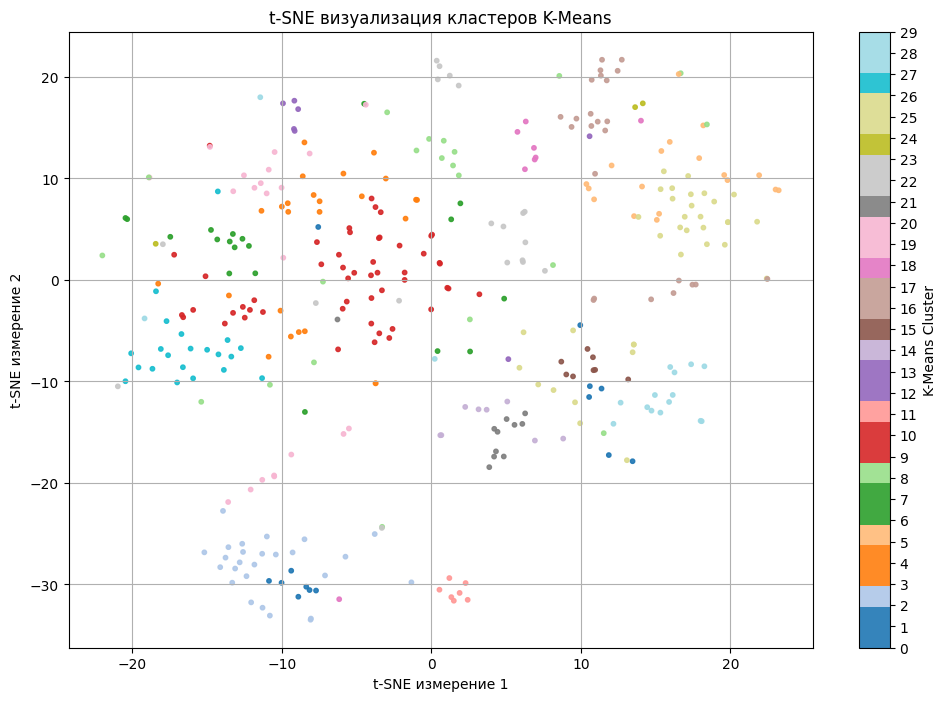

K-Means кластеры: {0: 7, 1: 7, 2: 26, 3: 7, 4: 17, 5: 19, 6: 9, 7: 10, 8: 21, 9: 10, 10: 41, 11: 7, 12: 1, 13: 6, 14: 8, 15: 8, 16: 6, 17: 18, 18: 8, 19: 7, 20: 14, 21: 11, 22: 12, 23: 7, 24: 3, 25: 24, 26: 11, 27: 21, 28: 12, 29: 5}
Файлы в кластере 11 (K-Means):
VoenObozren2016_2019_1_0019.t
VoenObozren2016_2019_1_0171.t
VoenObozren2016_2019_1_0347.t
VoenObozren2016_2019_1_0348.t
VoenObozren2016_2019_1_0365.t
VoenObozren2016_2019_1_0366.t
VoenObozren2016_2019_1_0367.t


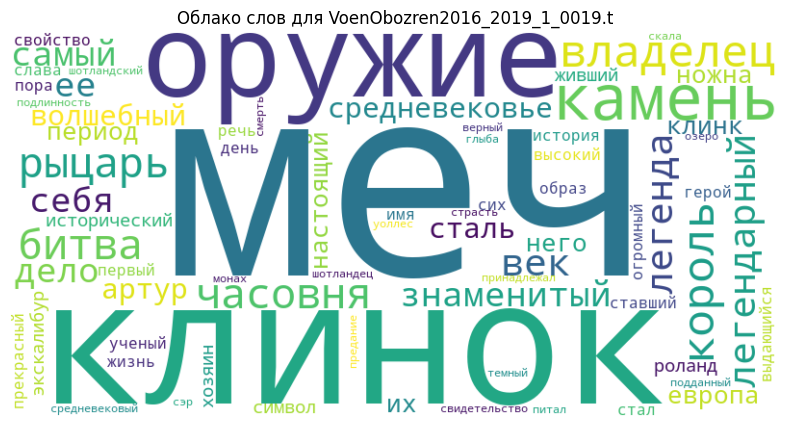

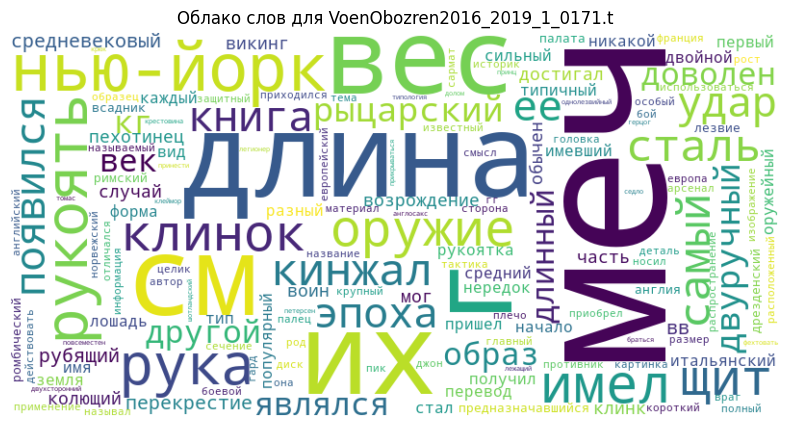

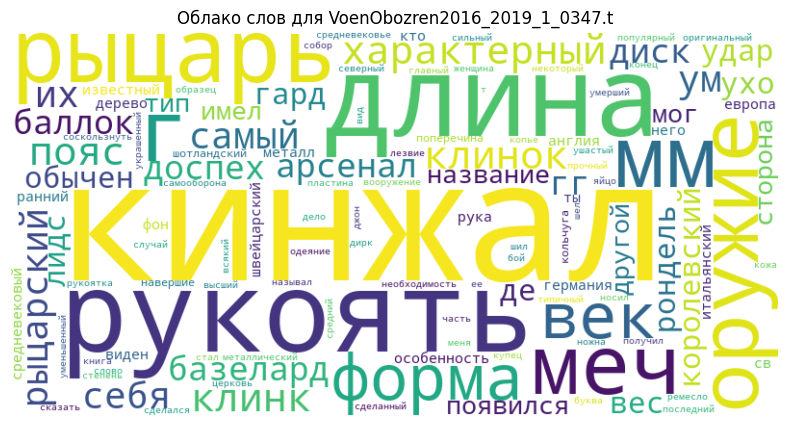

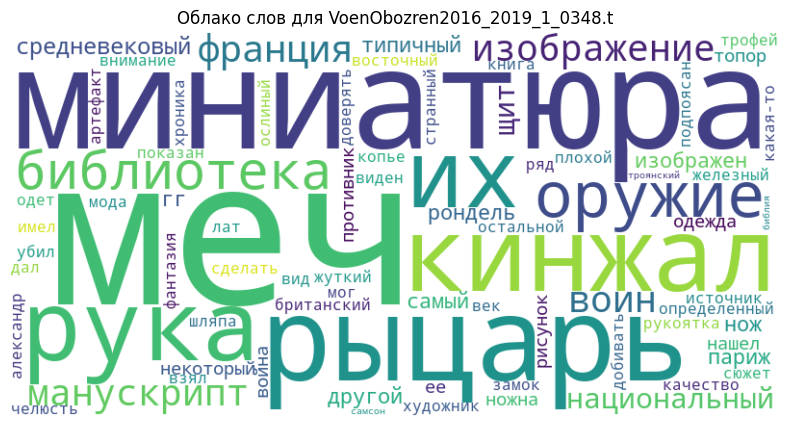

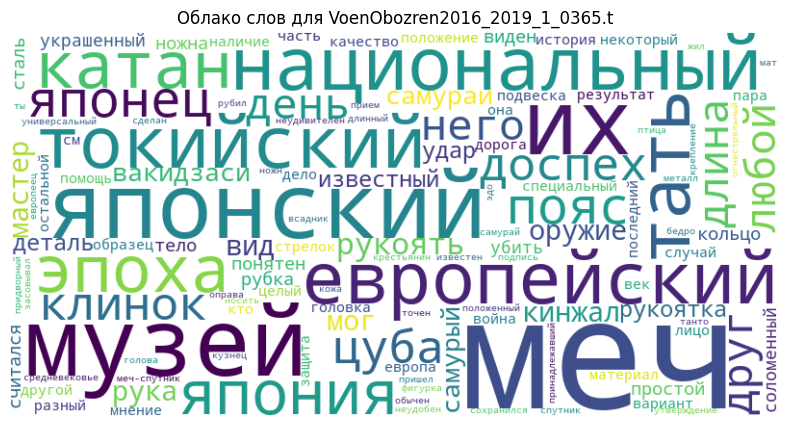

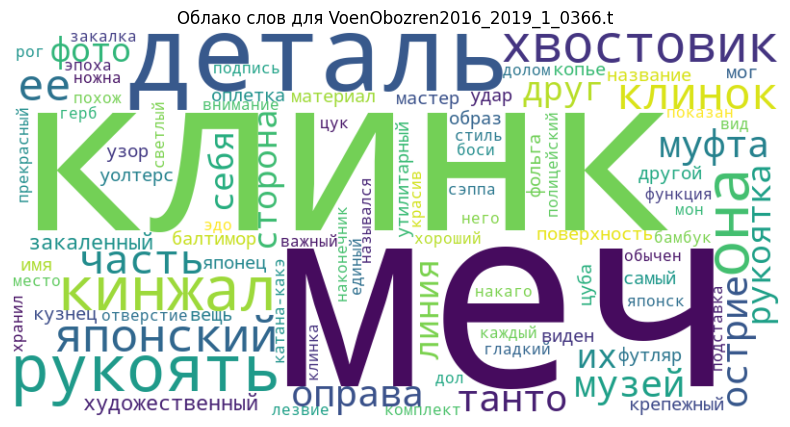

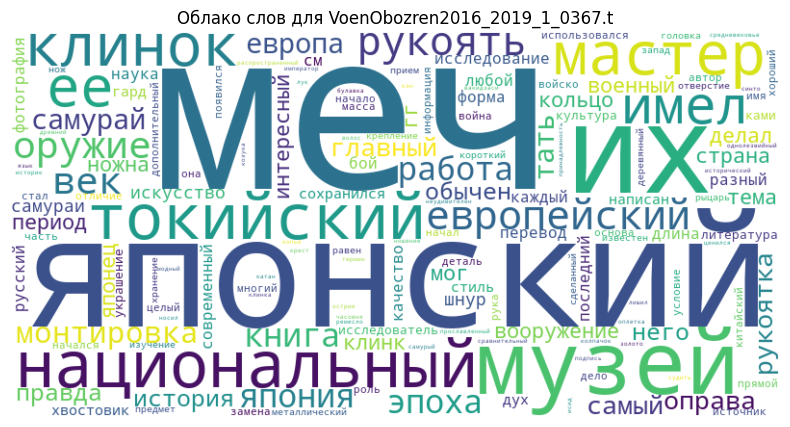

Document  Cluster
0    VoenObozren2016_2019_1_0001.t        8
1    VoenObozren2016_2019_1_0002.t       22
2    VoenObozren2016_2019_1_0003.t       26
3    VoenObozren2016_2019_1_0004.t        2
4    VoenObozren2016_2019_1_0005.t       27
..                             ...      ...
358  VoenObozren2016_2019_1_0363.t       14
359  VoenObozren2016_2019_1_0364.t       10
360  VoenObozren2016_2019_1_0365.t       11
361  VoenObozren2016_2019_1_0366.t       11
362  VoenObozren2016_2019_1_0367.t       11

[363 rows x 2 columns]

In [17]:
visualize_clusters(kmeans_clusters['Cluster'].values, tfidf_matrix, "K-Means")
generate_word_cloud(11, kmeans_clusters, "K-Means")
kmeans_clusters

In [18]:
kmeans_cluster_centers

Cluster                   Central_File
0         0  VoenObozren2016_2019_1_0337.t
1         1  VoenObozren2016_2019_1_0118.t
2         2  VoenObozren2016_2019_1_0222.t
3         3  VoenObozren2016_2019_1_0077.t
4         4  VoenObozren2016_2019_1_0279.t
5         5  VoenObozren2016_2019_1_0292.t
6         6  VoenObozren2016_2019_1_0105.t
7         7  VoenObozren2016_2019_1_0059.t
8         8  VoenObozren2016_2019_1_0033.t
9         9  VoenObozren2016_2019_1_0099.t
10       10  VoenObozren2016_2019_1_0067.t
11       11  VoenObozren2016_2019_1_0367.t
12       12  VoenObozren2016_2019_1_0126.t
13       13  VoenObozren2016_2019_1_0320.t
14       14  VoenObozren2016_2019_1_0363.t
15       15  VoenObozren2016_2019_1_0236.t
16       16  VoenObozren2016_2019_1_0024.t
17       17  VoenObozren2016_2019_1_0124.t
18       18  VoenObozren2016_2019_1_0327.t
19       19  VoenObozren2016_2019_1_0283.t
20       20  VoenObozren2016_2019_1_0162.t
21       21  VoenObozren2016_2019_1_0073.t
22       22  VoenObozren2016_2019_1_0025.t
23       23  VoenObozren2016_2019_1_0342.t
24       24  VoenObozren2016_2019_1_0287.t
25       25  VoenObozren2016_2019_1_0062.t
26       26  VoenObozren2016_2019_1_0221.t
27       27  VoenObozren2016_2019_1_0082.t
28       28  VoenObozren2016_2019_1_0353.t
29       29  VoenObozren2016_2019_1_0185.t

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21680\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


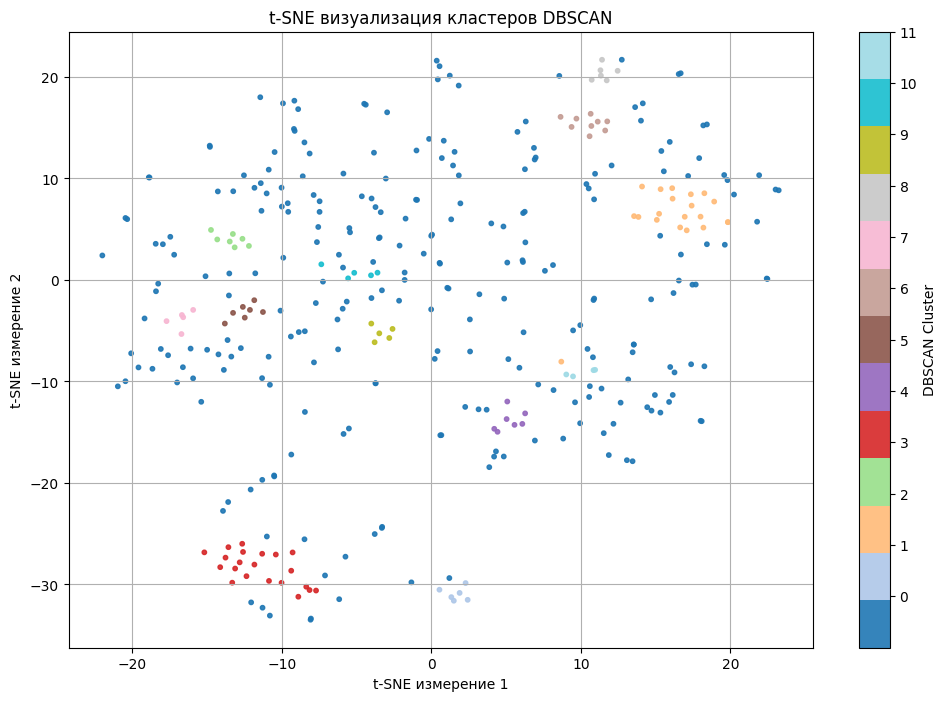

DBSCAN кластеры: {-1: 261, 0: 6, 1: 20, 2: 7, 3: 21, 4: 7, 5: 7, 6: 9, 7: 5, 8: 6, 9: 5, 10: 5, 11: 4}
Файлы в кластере 8 (DBSCAN):
VoenObozren2016_2019_1_0136.t
VoenObozren2016_2019_1_0244.t
VoenObozren2016_2019_1_0245.t
VoenObozren2016_2019_1_0246.t
VoenObozren2016_2019_1_0247.t
VoenObozren2016_2019_1_0248.t


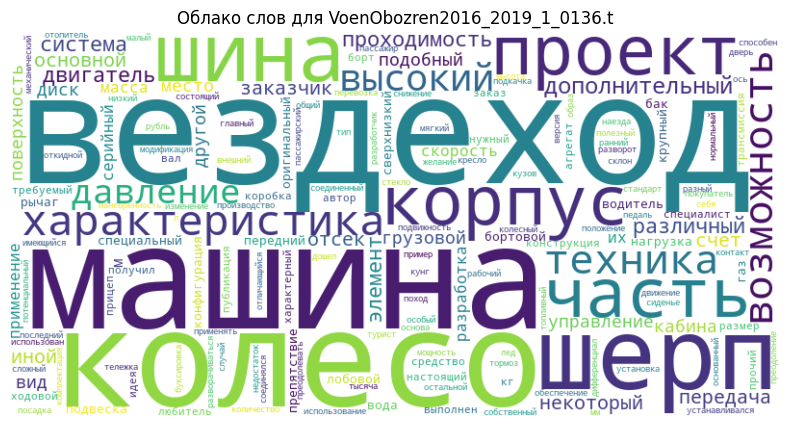

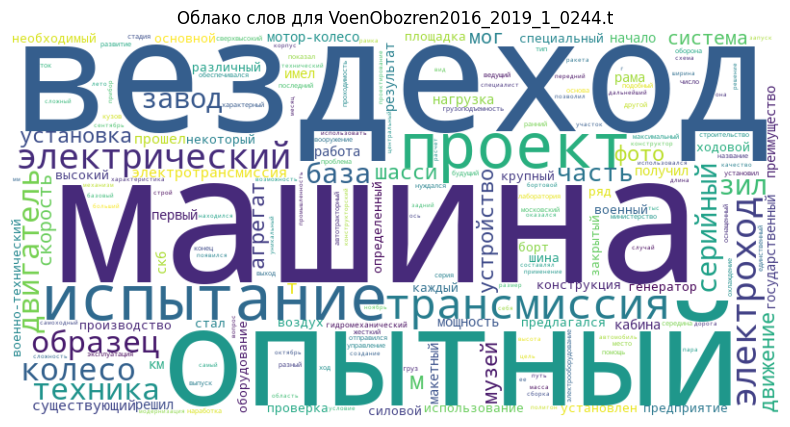

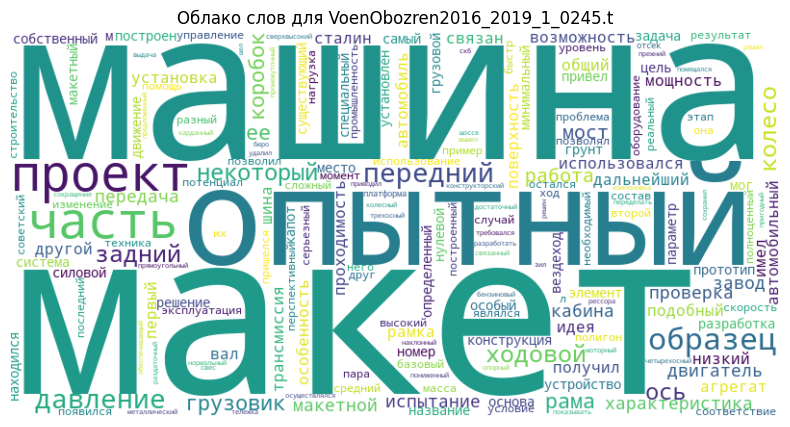

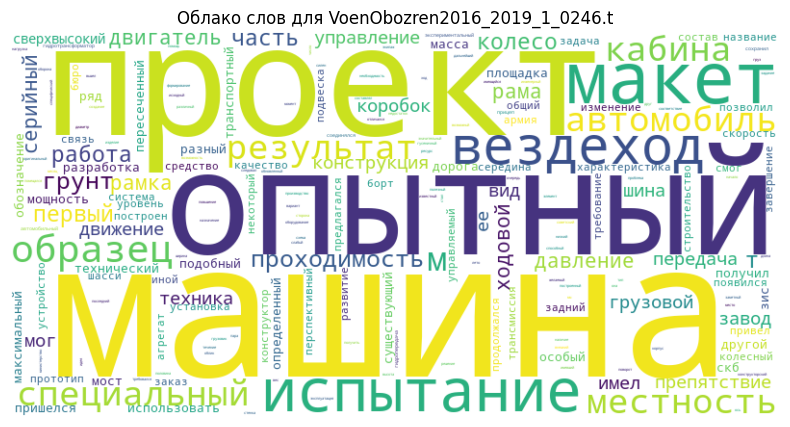

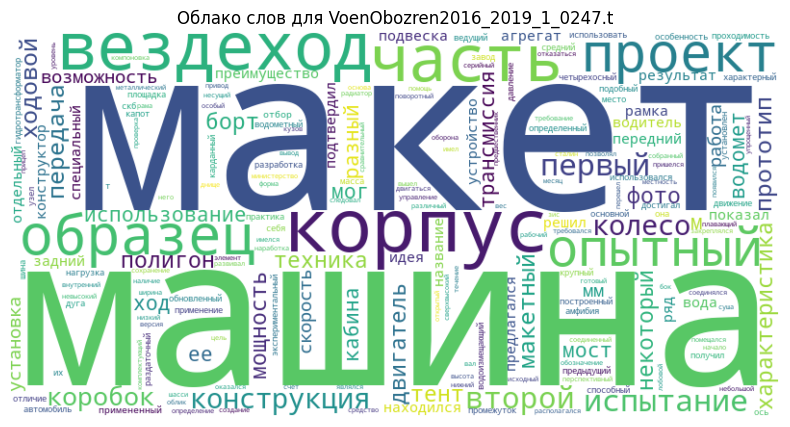

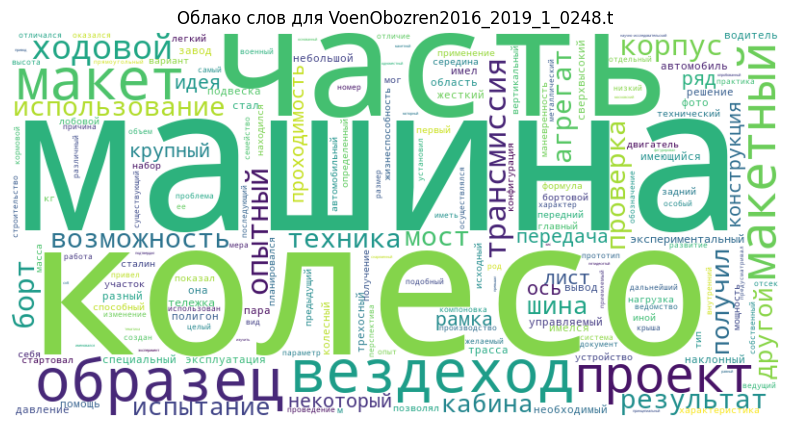

Document  Cluster
0    VoenObozren2016_2019_1_0001.t       -1
1    VoenObozren2016_2019_1_0002.t       -1
2    VoenObozren2016_2019_1_0003.t       -1
3    VoenObozren2016_2019_1_0004.t       -1
4    VoenObozren2016_2019_1_0005.t       -1
..                             ...      ...
358  VoenObozren2016_2019_1_0363.t       -1
359  VoenObozren2016_2019_1_0364.t       -1
360  VoenObozren2016_2019_1_0365.t        0
361  VoenObozren2016_2019_1_0366.t        0
362  VoenObozren2016_2019_1_0367.t        0

[363 rows x 2 columns]

In [19]:
visualize_clusters(dbscan_clusters['Cluster'].values, tfidf_matrix, "DBSCAN")
generate_word_cloud(8, dbscan_clusters, "DBSCAN")
dbscan_clusters

In [20]:
dbscan_cluster_centers

Cluster                   Central_File
0         0  VoenObozren2016_2019_1_0367.t
1         1  VoenObozren2016_2019_1_0062.t
2         2  VoenObozren2016_2019_1_0105.t
3         3  VoenObozren2016_2019_1_0141.t
4         4  VoenObozren2016_2019_1_0073.t
5         5  VoenObozren2016_2019_1_0095.t
6         6  VoenObozren2016_2019_1_0129.t
7         7  VoenObozren2016_2019_1_0213.t
8         8  VoenObozren2016_2019_1_0248.t
9         9  VoenObozren2016_2019_1_0267.t
10       10  VoenObozren2016_2019_1_0291.t
11       11  VoenObozren2016_2019_1_0236.t

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21680\3354410083.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


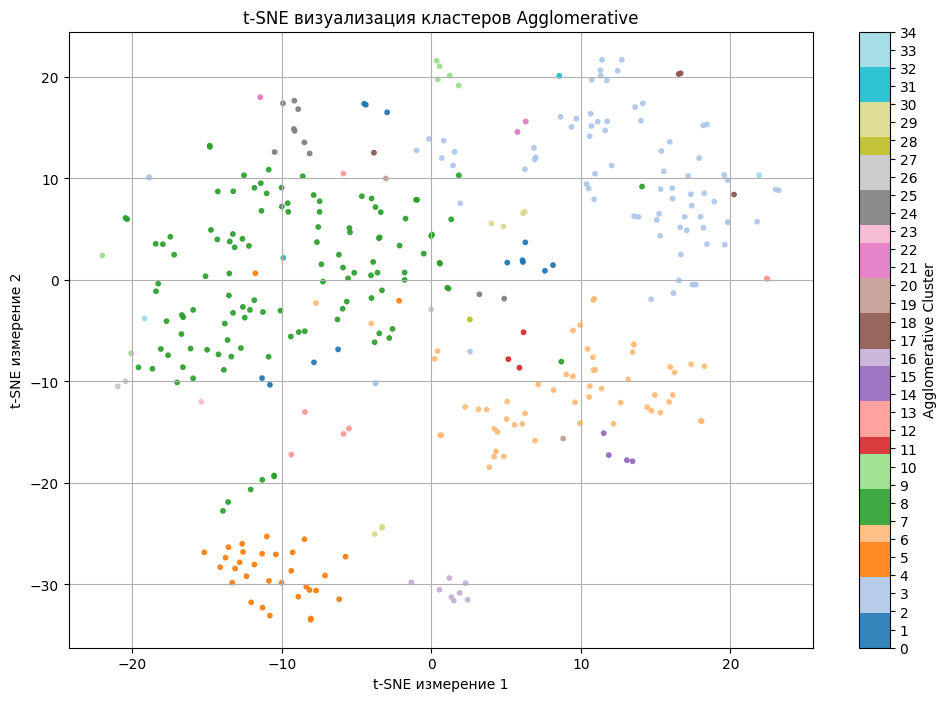

Agglomerative кластеры: {0: 7, 1: 6, 2: 69, 3: 10, 4: 31, 5: 2, 6: 56, 7: 6, 8: 112, 9: 5, 10: 2, 11: 3, 12: 5, 13: 2, 14: 3, 15: 1, 16: 8, 17: 2, 18: 2, 19: 1, 20: 1, 21: 2, 22: 1, 23: 1, 24: 8, 25: 2, 26: 2, 27: 1, 28: 1, 29: 3, 30: 4, 31: 1, 32: 1, 33: 1, 34: 1}
Файлы в кластере 11 (Agglomerative):
VoenObozren2016_2019_1_0009.t
VoenObozren2016_2019_1_0015.t
VoenObozren2016_2019_1_0147.t


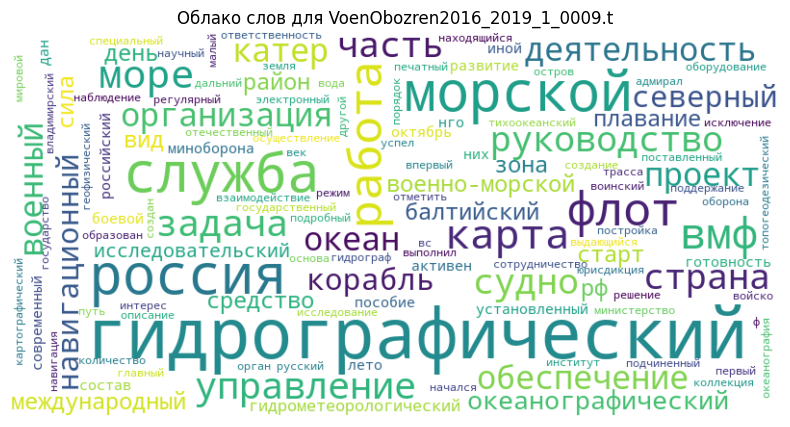

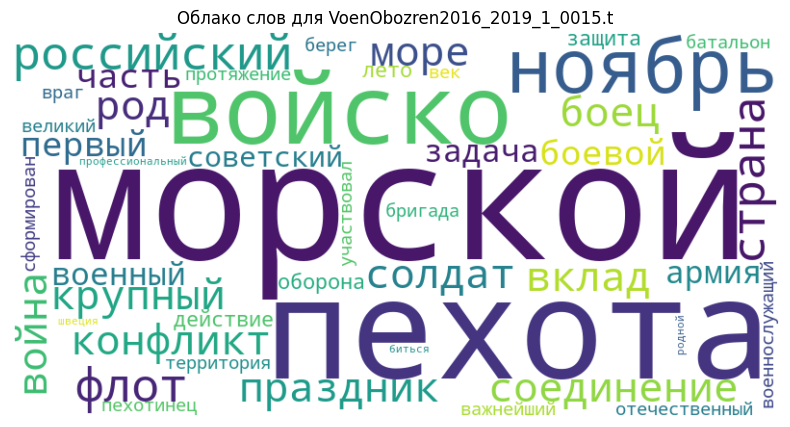

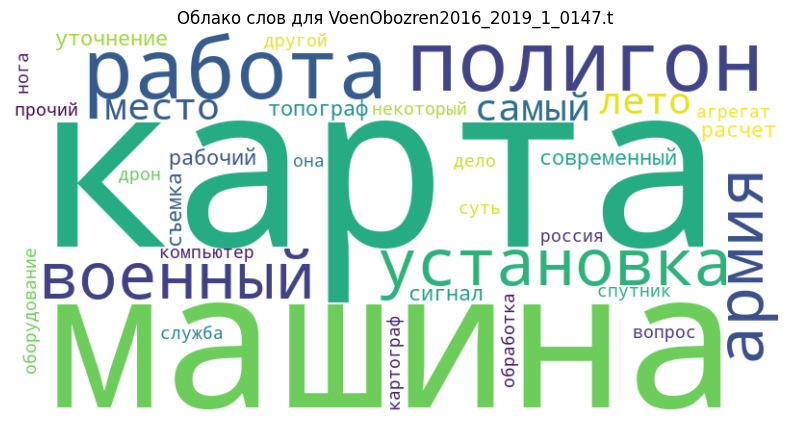

Document  Cluster
0    VoenObozren2016_2019_1_0001.t       29
1    VoenObozren2016_2019_1_0002.t       30
2    VoenObozren2016_2019_1_0003.t        6
3    VoenObozren2016_2019_1_0004.t        7
4    VoenObozren2016_2019_1_0005.t        8
..                             ...      ...
358  VoenObozren2016_2019_1_0363.t        6
359  VoenObozren2016_2019_1_0364.t        8
360  VoenObozren2016_2019_1_0365.t       16
361  VoenObozren2016_2019_1_0366.t       16
362  VoenObozren2016_2019_1_0367.t       16

[363 rows x 2 columns]

In [21]:
visualize_clusters(agglo_clusters['Cluster'].values, tfidf_matrix, "Agglomerative")
generate_word_cloud(11, agglo_clusters, "Agglomerative")
agglo_clusters

In [22]:
agglo_cluster_centers

Cluster                   Central_File
0         0  VoenObozren2016_2019_1_0020.t
1         1  VoenObozren2016_2019_1_0289.t
2         2  VoenObozren2016_2019_1_0292.t
3         3  VoenObozren2016_2019_1_0033.t
4         4  VoenObozren2016_2019_1_0222.t
5         5  VoenObozren2016_2019_1_0010.t
6         6  VoenObozren2016_2019_1_0073.t
7         7  VoenObozren2016_2019_1_0283.t
8         8  VoenObozren2016_2019_1_0067.t
9         9  VoenObozren2016_2019_1_0342.t
10       10  VoenObozren2016_2019_1_0044.t
11       11  VoenObozren2016_2019_1_0009.t
12       12  VoenObozren2016_2019_1_0008.t
13       13  VoenObozren2016_2019_1_0007.t
14       14  VoenObozren2016_2019_1_0208.t
15       15  VoenObozren2016_2019_1_0237.t
16       16  VoenObozren2016_2019_1_0367.t
17       17  VoenObozren2016_2019_1_0083.t
18       18  VoenObozren2016_2019_1_0133.t
19       19  VoenObozren2016_2019_1_0016.t
20       20  VoenObozren2016_2019_1_0225.t
21       21  VoenObozren2016_2019_1_0014.t
22       22  VoenObozren2016_2019_1_0319.t
23       23  VoenObozren2016_2019_1_0089.t
24       24  VoenObozren2016_2019_1_0320.t
25       25  VoenObozren2016_2019_1_0114.t
26       26  VoenObozren2016_2019_1_0049.t
27       27  VoenObozren2016_2019_1_0087.t
28       28  VoenObozren2016_2019_1_0233.t
29       29  VoenObozren2016_2019_1_0018.t
30       30  VoenObozren2016_2019_1_0025.t
31       31  VoenObozren2016_2019_1_0143.t
32       32  VoenObozren2016_2019_1_0177.t
33       33  VoenObozren2016_2019_1_0264.t
34       34  VoenObozren2016_2019_1_0311.t

In [23]:
output_path = "data\\words\\dataprocessed_dataset.csv"
df.to_csv(output_path, index=False, encoding='windows-1251')
print(f"Данные успешно сохранены в {output_path}")

Данные успешно сохранены в data\words\dataprocessed_dataset.csv
